In [ ]:
#importando drive com imagens
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pathlib


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Updated import statements
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras import metrics

In [ ]:
data_dir = pathlib.Path("/content/drive/MyDrive/TCC_DOCS/dataset_balanceado")
print(data_dir)

/content/drive/MyDrive/TCC_DOCS/dataset_balanceado


In [ ]:
#tamanho de imagem
vgg16_img_size = 100
#número de exemplos que serão processados juntos em uma única iteração do modelo durante o treinamento
vgg16_batch_size = 150

vgg16_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(vgg16_img_size, vgg16_img_size),
    batch_size=vgg16_batch_size)

vgg16_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(vgg16_img_size,vgg16_img_size),
    batch_size=vgg16_batch_size)

vgg16_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(vgg16_img_size,vgg16_img_size),
    batch_size=vgg16_batch_size)

class_names = vgg16_test_ds.class_names

Found 6544 files belonging to 5 classes.
Found 6544 files belonging to 5 classes.
Using 1308 files for validation.
Found 6544 files belonging to 5 classes.


In [ ]:
for image_batch, labels_batch in vgg16_train_ds:
  vgg16_train_img = image_batch
  vgg16_train_labels = labels_batch
  break
for image_batch, labels_batch in vgg16_val_ds:
  vgg16_val_img = image_batch
  vgg16_val_labels = labels_batch
  break
for image_batch, labels_batch in vgg16_test_ds:
  vgg16_test_img = image_batch
  vgg16_test_labels = labels_batch
  break

In [ ]:
# ajusta automaticamente o número de threads para o pré-processamento dos dados. melhorar a performance e a eficiência do pipeline de dados.
AUTOTUNE = tf.data.experimental.AUTOTUNE

vgg16_train_ds = vgg16_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
vgg16_val_ds = vgg16_val_ds.cache().prefetch(buffer_size=AUTOTUNE)
vgg16_test_ds = vgg16_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# VGG16
img_shape = (vgg16_img_size,vgg16_img_size,3)
VGG16_model = tf.keras.applications.VGG16(input_shape=img_shape,include_top=False,weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
VGG16_model.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(5,activation='relu',bias_regularizer=regularizers.l2(1e-4))

In [ ]:
num_classes = 5
vgg16_model = Sequential([
    VGG16_model,
    prediction_layer,
    global_average_layer,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Activation('softmax'),
])

ValueError: Undefined shapes are not supported.

In [ ]:
vgg16_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs = 50
history = vgg16_model.fit(
  vgg16_train_ds,
  validation_data=vgg16_val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44/44 ━━━━━━━━━━━━━━━━━━━━ 488s 595ms/step - accuracy: 0.2929 - loss: 1.7205 - val_accuracy: 0.4946 - val_loss: 1.4594
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.4844 - loss: 1.2448 - val_accuracy: 0.5436 - val_loss: 1.1313
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5638 - loss: 1.1087 - val_accuracy: 0.5872 - val_loss: 1.0354
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.5903 - loss: 1.0478 - val_accuracy: 0.6239 - val_loss: 0.9725
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6120 - loss: 1.0079 - val_accuracy: 0.6437 - val_loss: 0.9446
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6369 - loss: 0.9673 - val_accuracy: 0.6728 - val_loss: 0.9131
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6642 - loss: 0.9224 - val_accuracy: 0.6820 - val_loss: 0.8920
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6749 - loss: 0.9015 - val_accuracy: 0.7057 - val_loss:

In [ ]:
vgg16_loss, vgg16_acc = vgg16_model.evaluate(vgg16_test_ds)

44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 459ms/step - accuracy: 0.7885 - loss: 0.5906


In [ ]:
vgg16_y_pred=np.argmax(vgg16_model.predict(vgg16_test_img), axis=-1)
vgg16_con_mat = tf.math.confusion_matrix(labels=vgg16_test_labels, predictions=vgg16_y_pred).numpy()

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [ ]:
vgg16_con_mat_norm = np.around(vgg16_con_mat.astype('float') / vgg16_con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

vgg16_con_mat_df = pd.DataFrame(vgg16_con_mat_norm,
                     index = class_names,
                     columns = class_names)

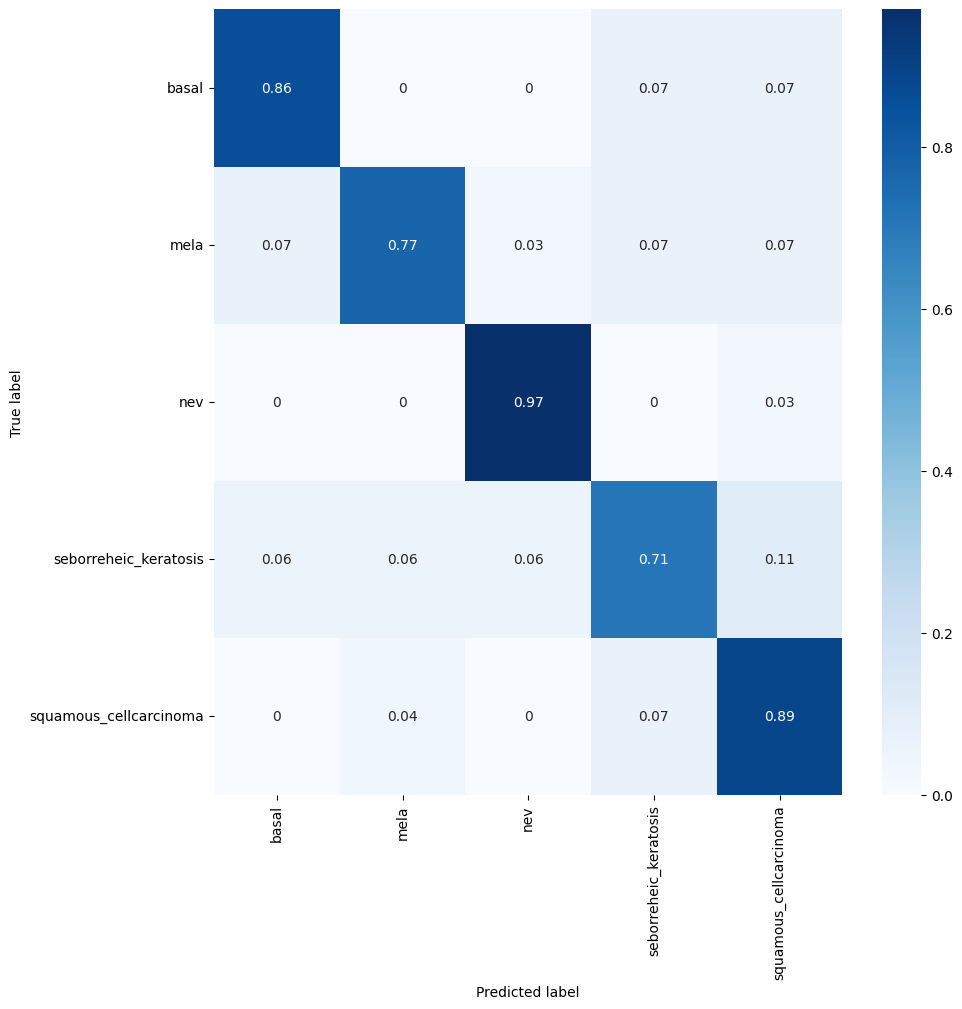

In [ ]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(vgg16_con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
vgg16_y_pred = vgg16_model.predict(vgg16_test_ds)
vgg16_predicted_categories = np.argmax(vgg16_y_pred, axis = 1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step


In [ ]:
vgg16_true_categories = tf.concat([y for x, y in vgg16_test_ds], axis = 0).numpy() # convert to np array

In [ ]:
print(classification_report(vgg16_true_categories, vgg16_predicted_categories))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1298
           1       0.80      0.82      0.81      1315
           2       0.94      0.94      0.94      1325
           3       0.75      0.70      0.73      1305
           4       0.68      0.73      0.70      1301

    accuracy                           0.78      6544
   macro avg       0.78      0.78      0.78      6544
weighted avg       0.79      0.78      0.78      6544

